# DATA CONTROL 2
##### QualityZone2

In [53]:
import dropbox
import pandas as pd
import numpy as np
import pecos
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import missingno as msno
import plotly
import plotly.graph_objs as go
import scipy
import dtale
import io

In [54]:
import lib.QualityZone2 as QZ2

In [62]:
dbx = dropbox.Dropbox('YOUR API KEY')
dbx.users_get_current_account()

FullAccount(account_id='dbid:AACj1T92Ouo-B3NLeesdoLNJNRb1P3i8ohk', name=Name(given_name='Dillon', surname='Ragar', familiar_name='Dillon', display_name='Dillon Ragar (Boulder Creek CZO)', abbreviated_name='DR'), email='dillon.ragar@colorado.edu', email_verified=True, disabled=False, locale='en', referral_link='https://www.dropbox.com/referrals/AABRfVGHwX87OblZnAuXfFjojQvm-8UMFh4?src=app9-4618416', is_paired=True, account_type=AccountType('business', None), root_info=UserRootInfo(root_namespace_id='2380155072', home_namespace_id='2380155072'), profile_photo_url=None, country='US', team=FullTeam(id='dbtid:AACTSmn976n3cpMzC0k6gE6HrTE0Zh0reP0', name='Boulder Creek CZO', sharing_policies=TeamSharingPolicies(shared_folder_member_policy=SharedFolderMemberPolicy('anyone', None), shared_folder_join_policy=SharedFolderJoinPolicy('from_anyone', None), shared_link_create_policy=SharedLinkCreatePolicy('default_public', None)), office_addin_policy=OfficeAddInPolicy('enabled', None)), team_member_id=

In [71]:
_, res = dbx.files_download('/CZO/BcCZO/Personnel_Folders/Dillon_Ragar/QualityZone/QZ_working_file.csv')
with io.BytesIO(res.content) as stream:
    working_df=pd.read_csv(stream, index_col=0)
    working_df.index = pd.to_datetime(working_df.index)

In [64]:
working_df.dtypes

GGL_SF_Met Record Number                                            int64
GGL_SF_Met Battery Voltage Minimum                                float64
PTemp_C_Avg                                                       float64
GGL_SF_Met tipping bucket rain gage, total, mm                    float64
GGL_SF_Met BP_mbar_Avg                                            float64
GGL_SF_Met Volumetric Water Content, Average fractional 22 cm     float64
GGL_SF_Met Volumetric Water Content, PA_uS_Avg 22 cm              float64
GGL_SF_Met Soil Temperature Average 22 cm                         float64
GGL_SF_Met Wind Speed Average m/sec                               float64
GGL_SF_Met  Wind Speed Max                                        float64
GGL_SF_Met  Time of Wind Speed Max                                 object
GGL_SF_Met Wind Speed m/sec Minimum                               float64
WS_ms_TMn                                                          object
GGL_SF_Met Net Radiation W/m^2 Average

In [65]:
working_df.index

DatetimeIndex(['2019-10-01 00:00:00', '2019-10-01 00:10:00',
               '2019-10-01 00:20:00', '2019-10-01 00:30:00',
               '2019-10-01 00:40:00', '2019-10-01 00:50:00',
               '2019-10-01 01:00:00', '2019-10-01 01:10:00',
               '2019-10-01 01:20:00', '2019-10-01 01:30:00',
               ...
               '2020-06-24 09:50:00', '2020-06-24 10:00:00',
               '2020-06-24 10:10:00', '2020-06-24 10:20:00',
               '2020-06-24 10:30:00', '2020-06-24 10:40:00',
               '2020-06-24 10:50:00', '2020-06-24 11:00:00',
               '2020-06-24 11:10:00', '2020-06-24 11:20:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=38517, freq=None)

In [66]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38517 entries, 2019-10-01 00:00:00 to 2020-06-24 11:20:00
Data columns (total 29 columns):
GGL_SF_Met Record Number                                          38517 non-null int64
GGL_SF_Met Battery Voltage Minimum                                38517 non-null float64
PTemp_C_Avg                                                       38517 non-null float64
GGL_SF_Met tipping bucket rain gage, total, mm                    38517 non-null float64
GGL_SF_Met BP_mbar_Avg                                            38517 non-null float64
GGL_SF_Met Volumetric Water Content, Average fractional 22 cm     38517 non-null float64
GGL_SF_Met Volumetric Water Content, PA_uS_Avg 22 cm              38517 non-null float64
GGL_SF_Met Soil Temperature Average 22 cm                         38517 non-null float64
GGL_SF_Met Wind Speed Average m/sec                               38517 non-null float64
GGL_SF_Met  Wind Speed Max                               

In [7]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38407 entries, 2019-10-01 00:00:00 to 2020-06-23 17:00:00
Data columns (total 8 columns):
Record Number                                                38407 non-null int64
Battery Voltage, DC Volts                                    38407 non-null float64
Soill Moisture, Volumetric Water Content, 5 cm, fraction     38407 non-null float64
Soil Moisture, CS616 period average, 5 cm, u sec             38407 non-null float64
Soil Temperature, 5 cm, degree C                             38407 non-null float64
Soill Moisture, Volumetric Water Content, 25 cm, fraction    38407 non-null float64
Soil Moisture, CS616 period average, 25 cm, u sec            38407 non-null float64
Soil Temperature, 25 cm, degree C                            38407 non-null float64
dtypes: float64(7), int64(1)
memory usage: 2.6 MB


# NEW missing data vis
# NEW drop duplicated *index*

In [72]:
working_df = working_df.loc[~working_df.index.duplicated(keep='first')]

In [73]:
working_df = working_df.asfreq('10min')

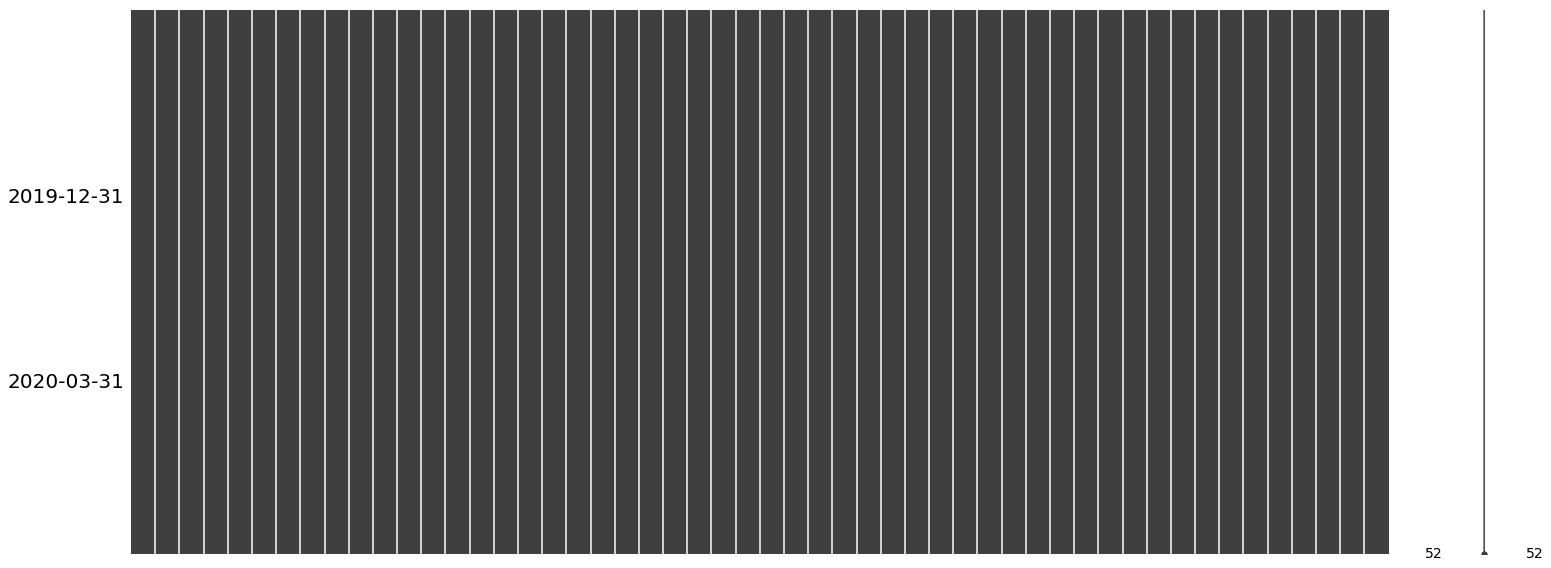

In [74]:
msno.matrix(working_df, freq='BQ')

In [14]:
dtale.show(working_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x133e197b8>,
      dtype=object)

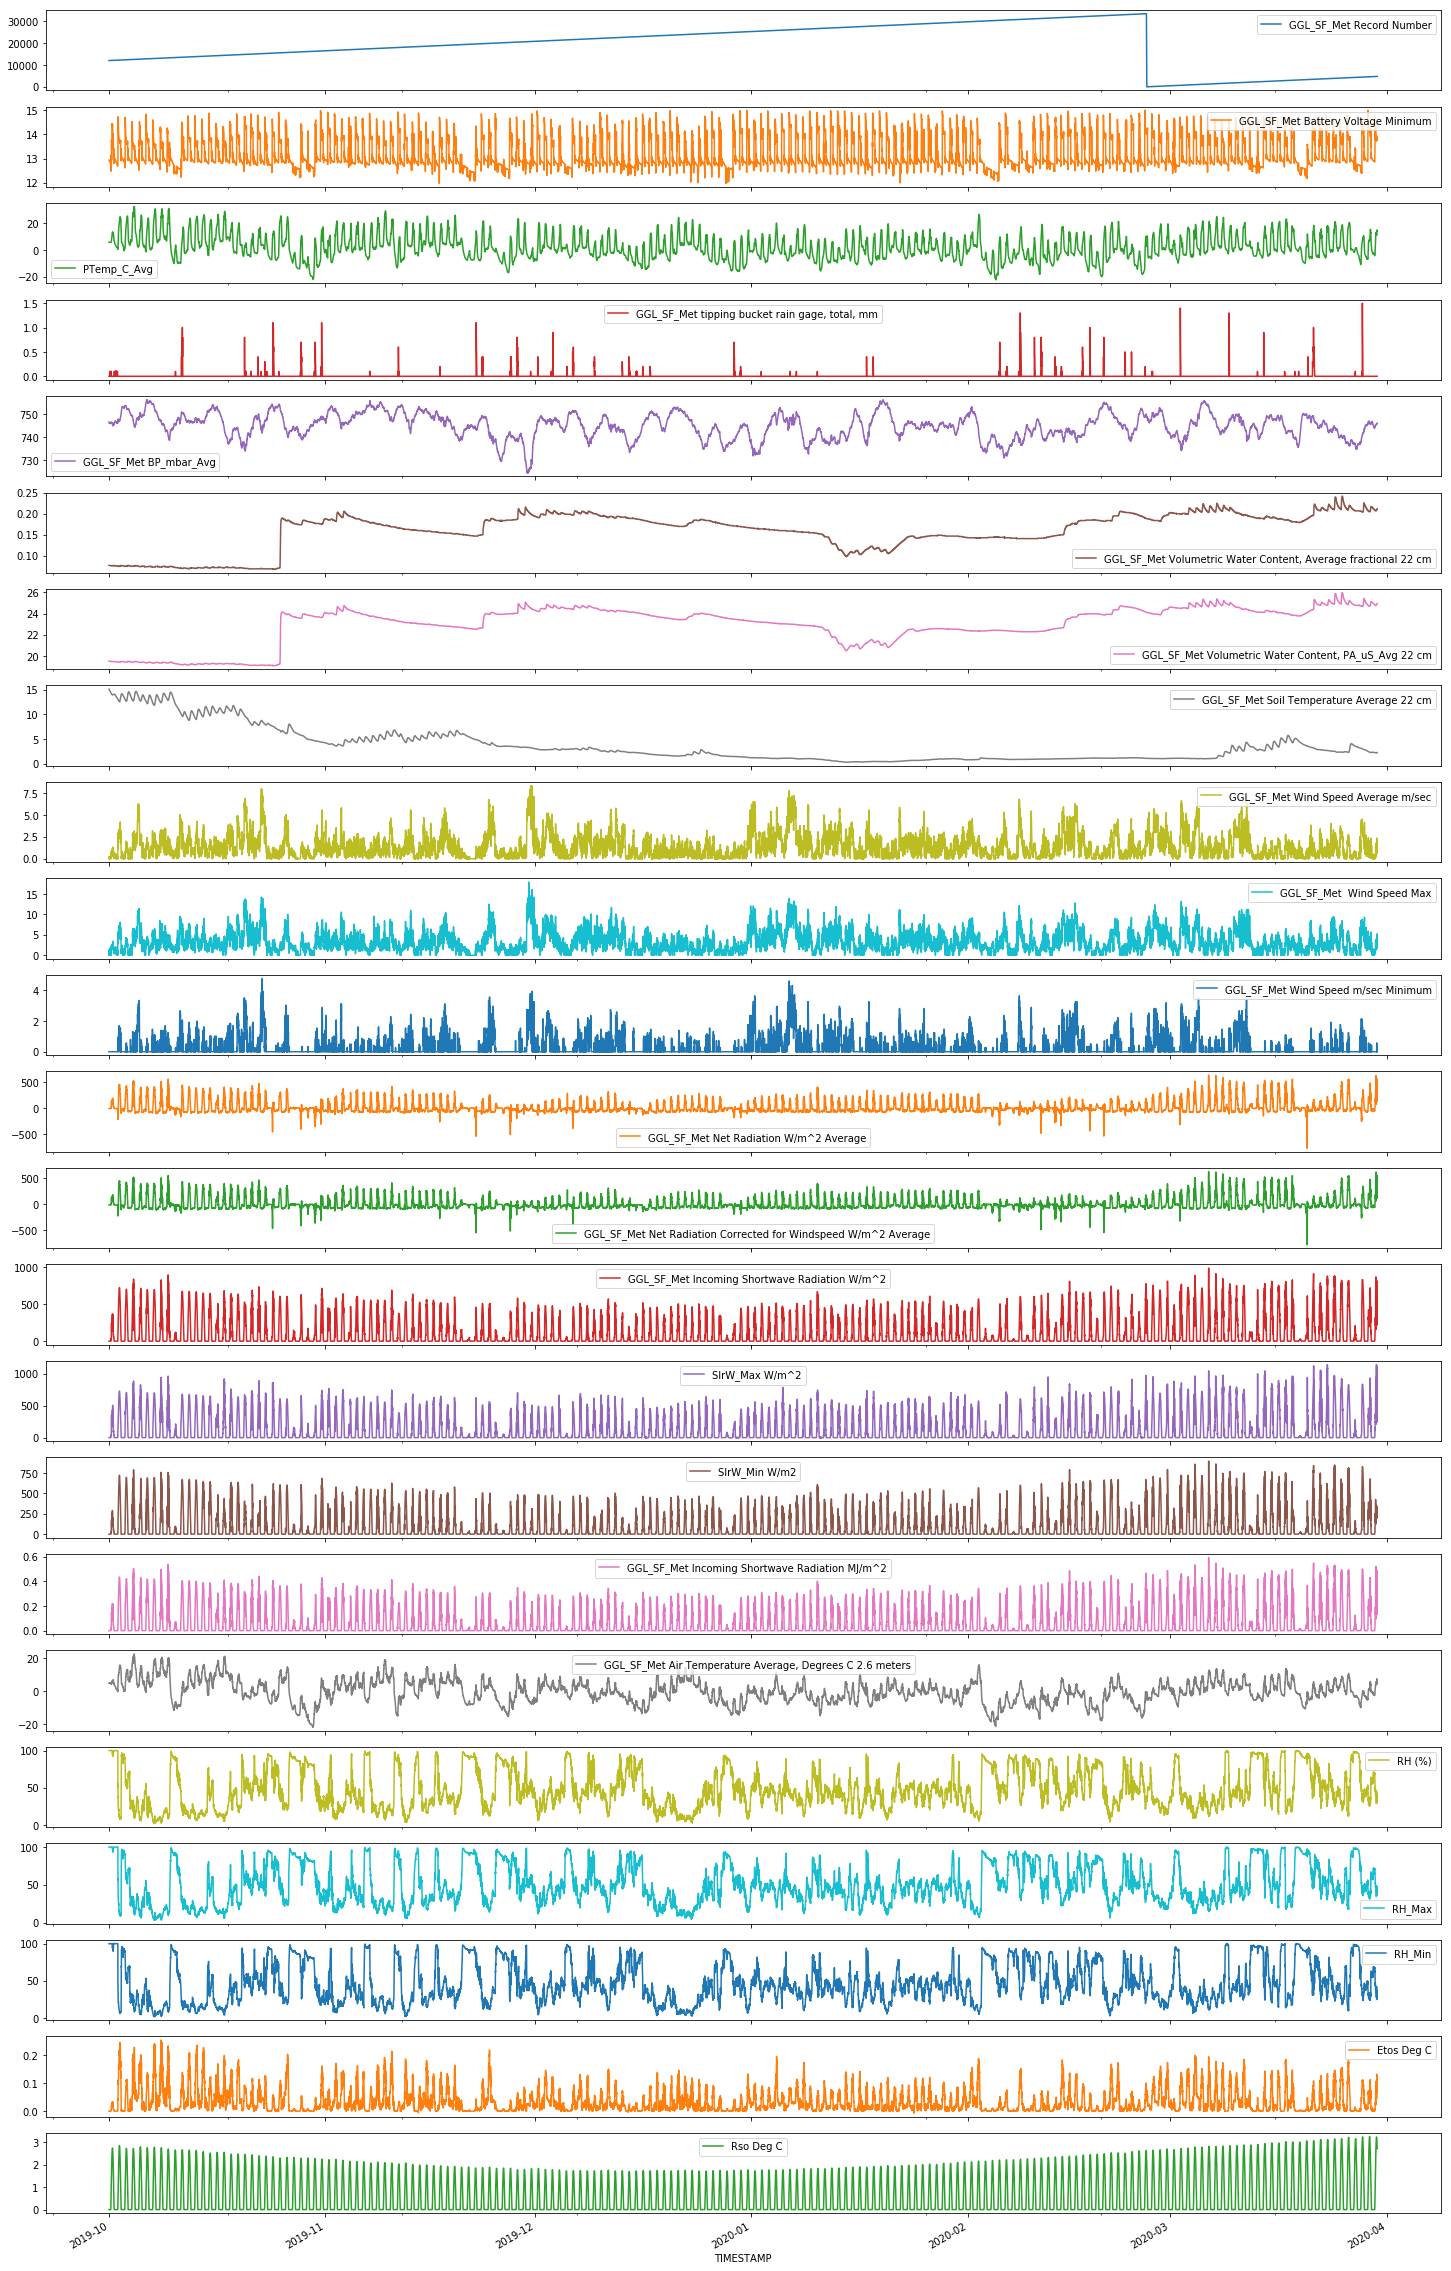

In [48]:
working_df.plot(subplots=True, figsize=(25,45))

In [ ]:
working_df['Wind Speed, Average, 10m elevation, meters/sec'].plot(figsize = (20, 8))

In [ ]:
dtale.show(working_df)

# Remove Duplicate Data

In [20]:
#working_df.drop_duplicates(inplace=True)
## DO NOT USE FOR TIME SERIES DATA !

## Find Anomalous points
#### Rolling median w/ difference threshold. Works best for isolated outliers.

In [ ]:
# returns a tuple of the identified outliers in a np.array and the name of the column that is used
def rolling_spike(threshold, window_size, outlier_column, df_in):
    df = df_in.copy()
    figsize = (17, 5)
    kw = dict(marker='o', linestyle='none', color='r', alpha=0.5)
    df['window'] = df[outlier_column].rolling(window=window_size).median()
    difference = np.abs(df[outlier_column] - df['window'])
    outlier_idx = difference > threshold
    fig, ax = plt.subplots(figsize=figsize)
    df[outlier_column].plot()
    df[outlier_column][outlier_idx].plot(**kw)
    (print("%s anomalies detected" % (np.sum(outlier_idx))))
    return outlier_idx, outlier_column, df
    


In [ ]:
spike_tup = rolling_spike(threshold=19, window_size=2, outlier_column='soil heat flux, average, 15cm depth, watts/m^2', df_in=working_df)

outliers = (spike_tup[0])
outlier_column = (spike_tup[1])
outlier_df = (spike_tup[2])

In [ ]:
working_df.to_csv('outlier_test.csv')

## Remove flagged outliers


In [ ]:
def remove_outliers(df_in, outlier_list, outlier_column):
    df = df_in.copy()
    # convert list to df column
    df['outlier_bool'] = outlier_list
    # drop rows in chosen column based on bool list from outlier_idx function
    df[outlier_column] = df[outlier_column].drop(df[outlier_column][df['outlier_bool'] == True].index)
    df[outlier_column].plot(figsize = (17, 5))
    df.drop(columns=['window', 'outlier_bool'], inplace=True)
    print('returning df with outliers and outlier idx columns removed')
    return df
    
    

In [ ]:
working_df = remove_outliers(df_in=outlier_df, outlier_list=outliers, outlier_column=outlier_column)

In [ ]:
oit

## Fixing bad NA representation from excel 

In [ ]:
# This snippet locates strings in the given columns and changes those values to NaN 
# Here used to remove 'NAN' values (which pandas considers a string) to the proper NA rep of 'NaN'
cols = ['GGSD_10, Temperature, deg C','GGSD_10, Travel Time, 10*us', 'GGSD_10, Distance, cm', 'GGSD_10, Retries, number']
mask = working_df[cols].applymap(lambda x: isinstance(x, (int, float)))

working_df[cols] = working_df[cols].where(mask)

In [ ]:
# same idea but for the entire DF
mask = working_df.applymap(lambda x: isinstance(x, (int, float)))

working_df = working_df.where(mask)



### select data by date range 

In [ ]:
working_df['2019-08-05':'2019-08-12']

In [ ]:

working_df.drop(working_df['GGL_NF_Met_tipping bucket rain gage, total, mm'].index['2019-6-16':'2019-7-3'], inplace=True)


In [26]:
def correct(x):
    return (x / .254) * .1

In [45]:
working_df['GGL_SF_Met tipping bucket rain gage, total, mm'].loc[ :'20200226'].apply(correct)

TIMESTAMP
2019-10-01 00:00:00    0.0
2019-10-01 00:10:00    0.0
2019-10-01 00:20:00    0.0
2019-10-01 00:30:00    0.0
2019-10-01 00:40:00    0.0
                      ... 
2020-02-26 23:10:00    0.0
2020-02-26 23:20:00    0.0
2020-02-26 23:30:00    0.0
2020-02-26 23:40:00    0.0
2020-02-26 23:50:00    0.0
Name: GGL_SF_Met tipping bucket rain gage, total, mm, Length: 21449, dtype: float64

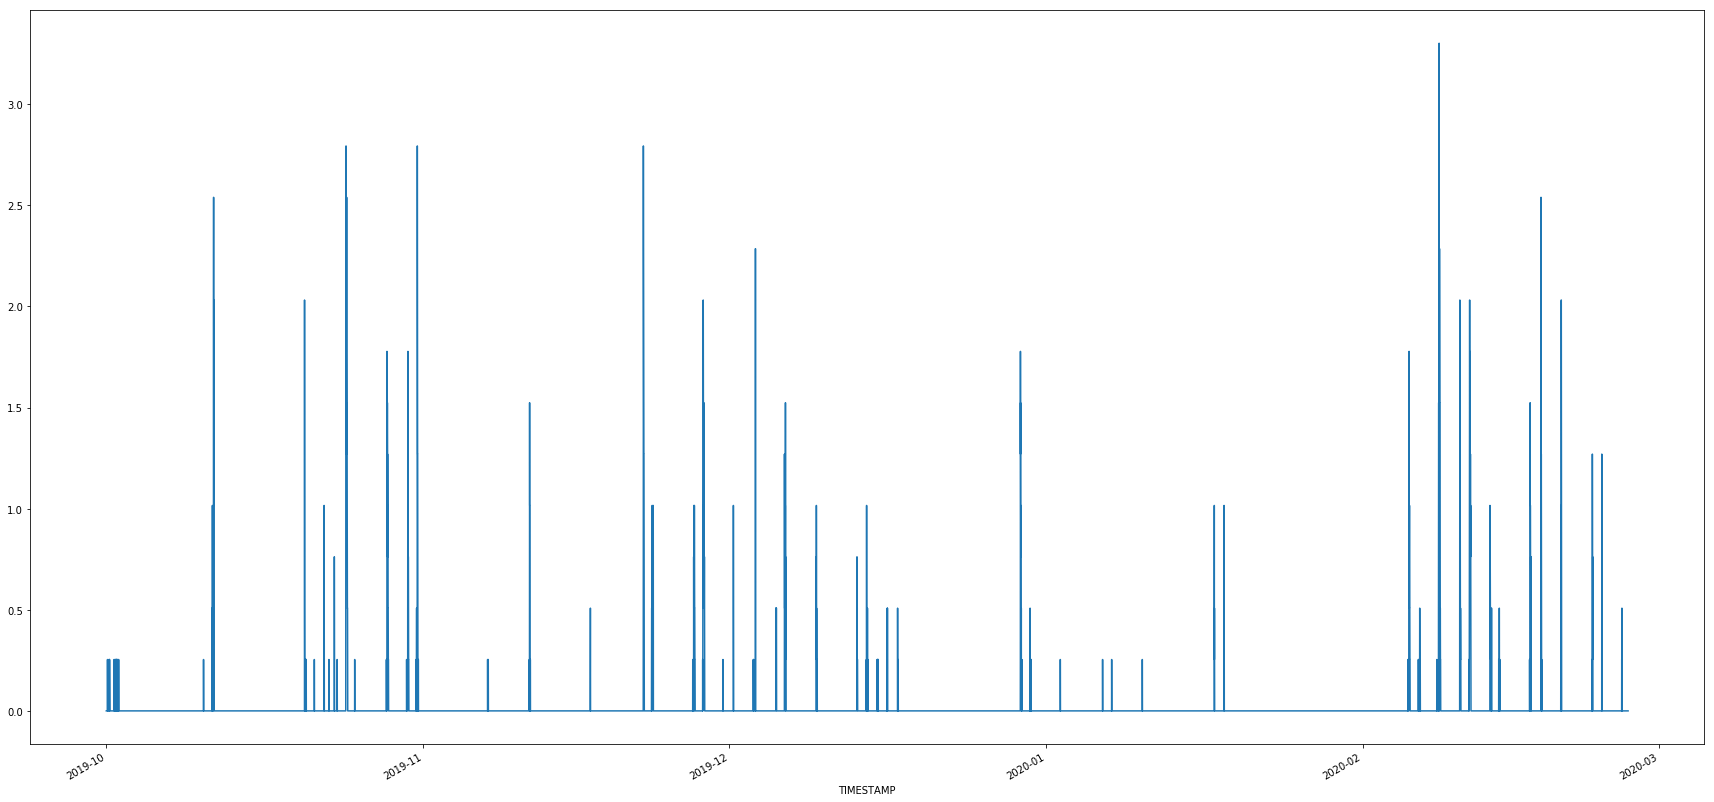

In [41]:
working_df['GGL_SF_Met tipping bucket rain gage, total, mm'].loc[ :'20200226'].plot(figsize=(30,15))

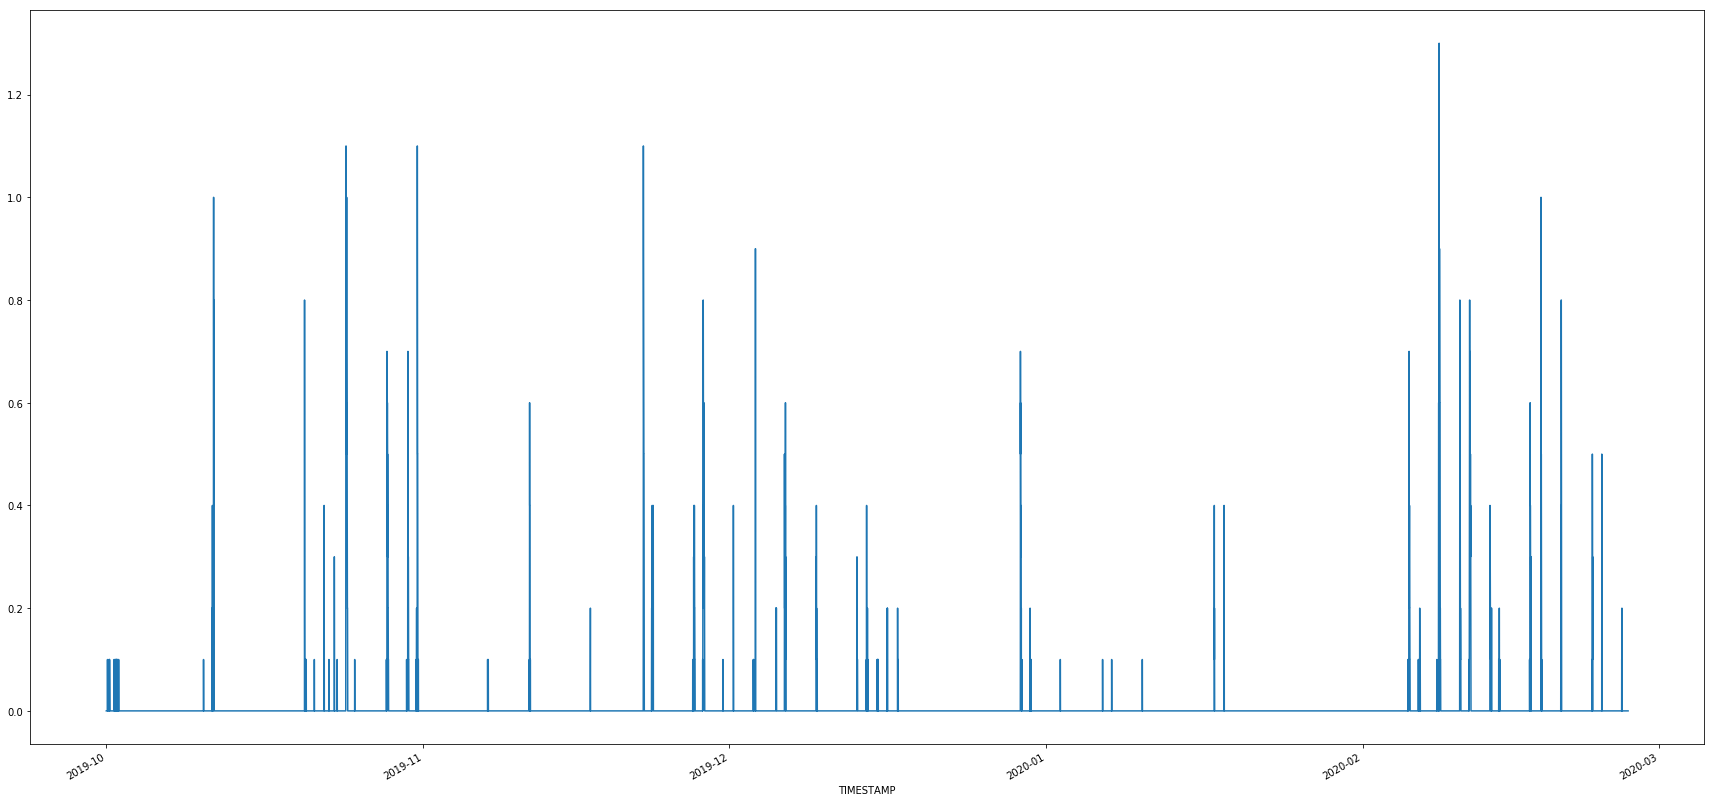

In [46]:
working_df['GGL_SF_Met tipping bucket rain gage, total, mm'].loc[ :'20200226'].plot(figsize=(30,15))

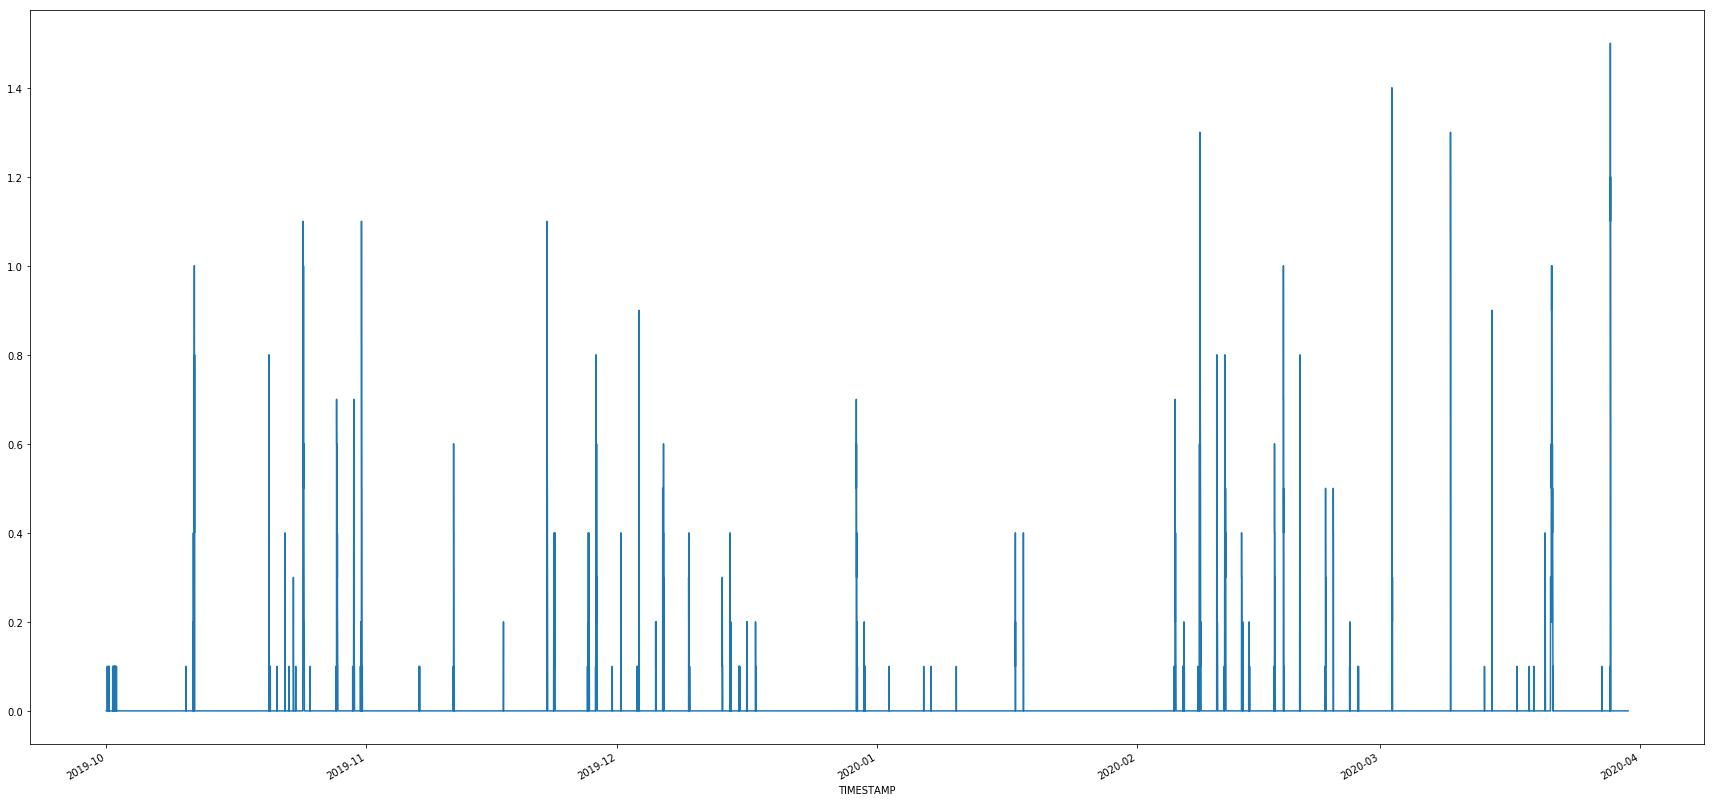

In [47]:
working_df['GGL_SF_Met tipping bucket rain gage, total, mm'].plot(figsize=(30,15))

## truncate past date

In [50]:
working_df = working_df.truncate(after=pd.Timestamp('2019-09-30 23:50'))

In [51]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52548 entries, 2018-10-01 00:00:00 to 2019-09-30 23:50:00
Data columns (total 14 columns):
Record Number                                      52548 non-null int64
Battery Voltage, minimum, Volts                    52548 non-null float64
5cm depth, Temperature, degree C                   52548 non-null float64
50cm depth, Temperature, deg C                     52548 non-null float64
100cm depth, Temperature, deg C                    52548 non-null float64
138cm depth, Temperature, deg C                    52548 non-null float64
5cm depth, Volumetric Water Content, fraction      52548 non-null float64
5cm depth, CS616 period average, u sec             52548 non-null float64
50cm depth, Volumetric Water Content, fraction     52548 non-null float64
50cm depth, CS616 period average, u sec            52548 non-null float64
100cm depth, Volumetric Water Content, fraction    52548 non-null float64
100cm depth, CS616 period average, u sec    

#### Remove values below given threshold

In [ ]:
working_df.drop(working_df[working_df['Water Potential 1 (kPa)'] < -50].index, inplace=True)


In [ ]:
working_df['Water Potential 1 (kPa)'].plot()

In [ ]:
working_df['Water Potential 1 (kPa)'].plot(style='.', figsize=(15,10))

In [ ]:
msno.matrix(working_df)
plt.show()

In [ ]:
working_df.index


In [ ]:
working_df.columns

### Special Plot

In [ ]:
trace1 = go.Scatter(
    x = working_df.index,
    y = working_df['GGL_NF_Met_tipping bucket rain gage, total, mm'],
    mode = 'lines',
)

fig = dict(data=[trace1])

plot_url = py.iplot(fig, filename='DataControl2_special_plot', auto_open=True)
    

In [ ]:
working_df['GGL_NF_Met_tipping bucket rain gage, total, mm'].plot(figsize=(20,6))

In [ ]:
working_df.index

## Remove duplicates

In [ ]:
working_df = working_df.drop_duplicates()

## Upload corrected df to dropbox

In [75]:
def df_to_dropbox(dataframe, upload_path):
    df_string = dataframe.to_csv(index_label='TIMESTAMP')
    db_bytes = bytes(df_string, 'utf8')
    dbx.files_upload(
        f=db_bytes,
        path=upload_path,
        mode=dropbox.files.WriteMode.overwrite
    )
    
path='/CZO/BcCZO/Personnel_Folders/Dillon_Ragar/QualityZone/QZ_working_file.csv' 
    
df_to_dropbox(working_df, path) 

ConnectionError: ('Connection aborted.', timeout('The write operation timed out'))